In [3]:
from sklearn.decomposition import *
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from time import time
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

A function to read and show images from mnist

In [4]:
def read(dataset = "training", path = "../dataset/"):
    if dataset is "training":
        fname_img = os.path.join(path+"/train", 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path+"train", 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path+"test", 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path+"test", 't10k-labels-idx1-ubyte')
    else:
        raise ValueError, "dataset must be 'testing' or 'training'"

    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    for i in xrange(len(lbl)):
        yield get_img(i)

def show(image):
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

Training to get the dictionaries

In [8]:
X = []
y = []
for label,img in read("training"):
    X.append(img.reshape(1,784)[0])
    y.append(label)

X = np.array(X)
t0 = time()
vader = MiniBatchDictionaryLearning(n_components=100, alpha=0.2, n_iter=200)
V = vader.fit(X).components_
U = vader.transform(X)
U.shape

(60000L, 100L)

In [21]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(y[i], cmap=plt.cm.gray_r),
                X[i].transpose())
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

In [9]:
from sklearn.model_selection import train_test_split

n_neighbors = 10
U_train, U_test, Uy_train, Uy_test = train_test_split(U, y, stratify=y,test_size=0.1)
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2).fit_transform(U_test)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Computing Isomap embedding
Done.


NameError: global name 'offsetbox' is not defined

In [35]:
from matplotlib import *
from matplotlib.offsetbox import *
%matplotlib inline
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            #print(y[i],y[i].shape,X[i],X[i].shape)
            temp =  offsetbox.TextArea(str(y[i]))
            imagebox = offsetbox.AnnotationBbox(temp,X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

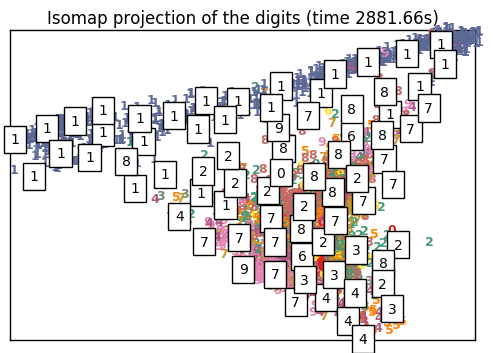

In [36]:
plot_embedding(X_iso,
               Uy_test,"Isomap projection of the digits (time %.2fs)" %
               (time() - t0))
plt.sh

In [38]:
import collections
print collections.Counter(Uy_test)

Counter({1: 674, 7: 627, 3: 613, 2: 596, 9: 595, 0: 592, 6: 592, 8: 585, 4: 584, 5: 542})


In [40]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(U_test)

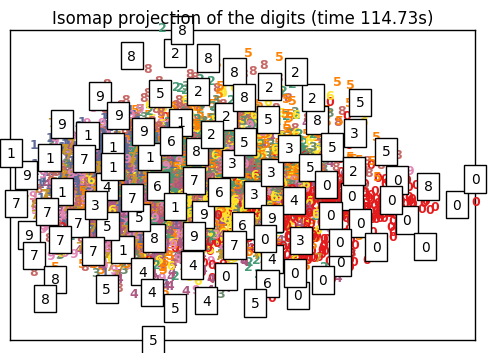

In [41]:
plot_embedding(X_tsne,
               Uy_test,"Isomap projection of the digits (time %.2fs)" %
               (time() - t0))